# User Knowledge Modeling Data Analysis: Group07 Project Proposal

# Introduction:

Electrical Direct Current Machines (DC) are machines that convert electrical energy into mechanical energy. The User Knowledge Modeling Data Set describes the students' knowledge level on the subject of Electrical DC Machines. They are important as they are used in common household appliances. Therefore, improving the learning and teaching of these machines by studying students’ knowledge of them is valuable.

The data set include three sheets: Information, Training_Data, and Test_Data. Sheet 1 includes the description of this data set,  such as characteristics, class distribution, and attribute information. 
Sheet 2 and 3 include five columns:
  - `STG` (dbl): degree of study time for goal object materials
  - `SCG`(dbl): degree of repetition number of user for goal object materials
  - `STR`(dbl):  degree of study time of the user for related objects with goal object
  - `LPR`(dbl): exam performance of user for related objects with goal object
  - `PEG`(dbl): exam performance of users for goal objects
  - `UNS`(char): knowledge level of user, classified into four categories: very low, low, middle, and high.
  
Using K-nearest neighbor algorithm, we’ll be predicting a categorical class for an observation given other known variables, a method known as classification.

Our predictive question: “What would a future user’s knowledge level based on the five user attributes?”

In [101]:
library(tidyverse)
library(readxl)
library(tidymodels)
set.seed(102)

# read the dataset into R
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "user.xls")
messy_user_data <- read_excel("user.xls", sheet = 2)
head(messy_user_data) # to show the first 6 observations in this dataframe

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


In [102]:
# Clean and wrangle the data into a tidy format
set.seed(102)
user_data <- messy_user_data |>
    select(STG: UNS) |>
    mutate(UNS = as_factor(UNS))
head(user_data) # to show the first 6 observations in this dataframe

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


We will not be needing to perform the initial split because our original data set has already been split into a training and test set. Earlier, we loaded sheet 2, which was the training data set. Here, we will rename the data set we read into R earlier to user_train and load the test data set from sheet 3.

In [103]:
# Rename user_data to user_train
set.seed(102)
user_train<-user_data

In [104]:
# Read the test dataset into R
set.seed(102)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "user.xls")
messy_user_test <- read_excel("user.xls", sheet = 3)
head(messy_user_test) # to show the first 6 observations in this dataframe

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)


In [105]:
# Clean and wrangle the data into a tidy format
set.seed(102)
user_test <- messy_user_test |>
    select(STG: UNS) |>
    mutate(UNS = as_factor(UNS))
head(user_test) # to show the first 6 observations in this dataframe

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


Now that we have our training and testing dataset, we will put our test dataset away for now while we tune our model in order to choose the best value of K.

In [112]:
set.seed(102)
# Create a 5-fold cross validation object
user_vfold <- vfold_cv(user_train, v = 5, strata = UNS)

# Create a recipe for the training set and standardize the data
user_recipe <- recipe(UNS ~ PEG, SCG, STG, LPR, STR, data = user_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# #create a knn model specification
 knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# #fit the knn model into a workflow with a range of possible K values
 k_vals <- tibble(neighbors = seq (from = 1, to = 40))
                
 knn_results <- workflow() |>
     add_recipe(user_recipe) |>
     add_model(knn_spec) |>
     tune_grid(resamples = user_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7596923,5,0.030709172,Preprocessor1_Model01
2,accuracy,multiclass,0.7556923,5,0.030355487,Preprocessor1_Model02
3,accuracy,multiclass,0.7673846,5,0.016195185,Preprocessor1_Model03
4,accuracy,multiclass,0.7830769,5,0.014876215,Preprocessor1_Model04
5,accuracy,multiclass,0.7901538,5,0.029365479,Preprocessor1_Model05
6,accuracy,multiclass,0.8250769,5,0.023966940,Preprocessor1_Model06
7,accuracy,multiclass,0.8213846,5,0.012565568,Preprocessor1_Model07
8,accuracy,multiclass,0.8290769,5,0.017672899,Preprocessor1_Model08
9,accuracy,multiclass,0.8370769,5,0.013417290,Preprocessor1_Model09


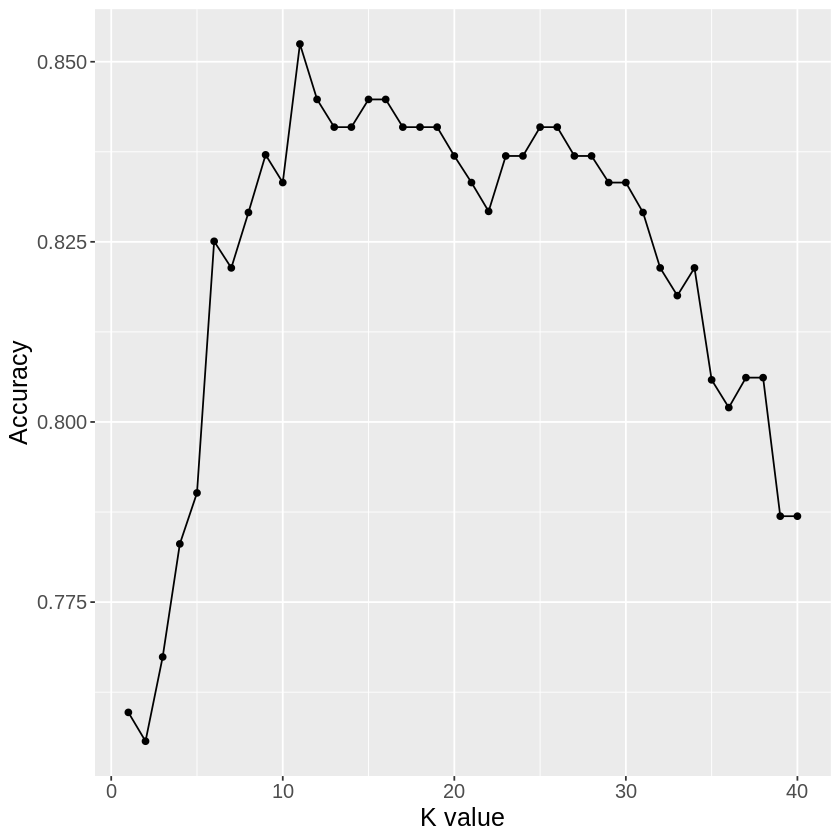

In [116]:
set.seed(102)
accuracies_plot <- knn_results |>
    ggplot( aes (y=mean, x=neighbors)) +
    geom_point() +
    geom_line () +
    labs (x= "K value", y= "Accuracy") +
    theme(text = element_text(size = 15))

accuracies_plot

From the graph, we can see that the most accurate K value is 11. 

In [128]:
knn_accuracy <- knn_results |>
    select(neighbors, mean) |>
    arrange(desc(mean)) |>
    slice

knn_accuracy

neighbors,mean
<int>,<dbl>
11,0.8524615
12,0.8447692
15,0.8447692
16,0.8447692
13,0.8409231
14,0.8409231
17,0.8409231
18,0.8409231
19,0.8409231
